# Predictive Analytics Portfolio Akram

## Het voorspellen van huisprijzen

In deze analyse zal ik de huisprijzen gaan voorspellen aan de hand van een gegeven dataset genaamd 'ABC'. In deze dataset zijn er een aantal variabalen, zoals aantal kamers, de opppervlakte van het huis etc. 





Ik zal een aantal stappen doorlopen voor het predicten van de huisprijzen. De stappen die ik zal doorlopen zijn hieronder, met een beschrijvng van wat er bij elke stap zal worden uitgevoerd. 

## 1. Data Exploration 

In de eerste stap is het van belang om de date te begrijpen. Hier gaan we dus data verzamelen door het te uploaden in de Jupyterhub notebook. Hierna zal ik vanuit een bepaald perspectief een kijkje nemen in mijn data om bepaalde aspecten duidelijk weer te geven. Dit is vooral om een beeld te krijgen met wat voor data ik mee te maken heb, wat voor kolommen er zijn, de features in de data, hoeveel numerieke en niet-numerieke waarden het bevat, of het een CSV bestand is, beschrijving in kaart brengen van de data types et cetera. 

### Importeren libraries

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [128]:
data = pd.read_csv("/datc/home/19066171/notebooks/house data.csv")

### Data exploreren & cleanen

In [43]:
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [47]:
data.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [106]:
# alles naar juiste datatypes parsen
# price naar int
# floors naar int
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float

In [130]:
data = data.round({'bathrooms': 0})

In [132]:
data = data.astype({"price":'int', "floors":'int', "bedrooms":'int', "bathrooms":'int'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   object
 15  city           4600 non-null   object
 16  statezip       4600 non-null   object
 17  country        4600 non-null   object
dtypes: int64(13), object(5)
memo

In [133]:
data.tail()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4595  2014-07-09 00:00:00  308166         3          2         1510      6360   
4596  2014-07-09 00:00:00  534333         3          2         1460      7573   
4597  2014-07-09 00:00:00  416904         3          2         3010      7014   
4598  2014-07-10 00:00:00  203400         4          2         2090      6630   
4599  2014-07-10 00:00:00  220600         3          2         1490      8102   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4595       1           0     0          4        1510              0   
4596       2           0     0          3        1460              0   
4597       2           0     0          3        3010              0   
4598       1           0     0          3        1070           1020   
4599       2           0     0          4        1490              0   

      yr_built  yr_renovated             street       city  statezip country  
4595      1954          1979     501 N 143rd St    Seattle  WA 98133     USA  
4596      1983          2009   14855 SE 10th Pl   Bellevue  WA 98007     USA  
4597      2009             0   759 Ilwaco Pl NE     Renton  WA 98059     USA  
4598      1974             0  5148 S Creston St    Seattle  WA 98178     USA  
4599      1990             0  18717 SE 258th St  Covington  WA 98042     USA

In [55]:
from sklearn.preprocessing import LabelEncoder

le_street = LabelEncoder()
le_city = LabelEncoder()
le_statezip = LabelEncoder()
le_country = LabelEncoder()

data['street_n'] = le_street.fit_transform(data['street'])
data['city_n'] = le_city.fit_transform(data['city'])
data['statezip_n'] = le_statezip.fit_transform(data['statezip'])
data['country_n'] = le_country.fit_transform(data['country'])
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0     1.5           0     0          3  ...      1955          2005   
1     2.0           0     4          5  ...      1921             0   
2     1.0           0     0          4  ...      1966             0   
3     1.0           0     0          4  ...      1963             0   
4     1.0           0     0          4  ...      1976          1992   

                     street       city  statezip country street_n city_n  \
0      18810 Densmore Ave N  Shoreline  WA 98133     USA     1522     36   
1           709 W Blaine St    Seattle  WA 98119     USA     3899     35   
2  26206-26214 143rd Ave SE       Kent  WA 98042     USA     2291     18   
3           857 170th Pl NE   Bellevue  WA 98008     USA     4263      3   
4         9105 170th Ave NE    Redmond  WA 98052     USA     4352     31   

   statezip_n  country_n  
0          62          0  
1          58          0  
2          26          0  
3           7          0  
4          31          0  

[5 rows x 22 columns]

In [147]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   object
 15  city           4600 non-null   object
 16  statezip       4600 non-null   object
 17  country        4600 non-null   object
dtypes: int64(13), object(5)
memo

In [45]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [46]:
# 4600 Rijen 
# 18 Kolommen
data.shape

(4600, 18)

In [48]:
# Er zijn geen NULL-waarden in deze dataset
# De waarde '0' komt wel voor niet verwarren!!!!!
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Data visualiseren

In [134]:
data.head()

date    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000         3          2         1340      7912   
1  2014-05-02 00:00:00  2384000         5          2         3650      9050   
2  2014-05-02 00:00:00   342000         3          2         1930     11947   
3  2014-05-02 00:00:00   420000         3          2         2000      8030   
4  2014-05-02 00:00:00   550000         4          2         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0       1           0     0          3        1340              0      1955   
1       2           0     4          5        3370            280      1921   
2       1           0     0          4        1930              0      1966   
3       1           0     0          4        1000           1000      1963   
4       1           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [141]:
data['sqft_living'].max()

13540

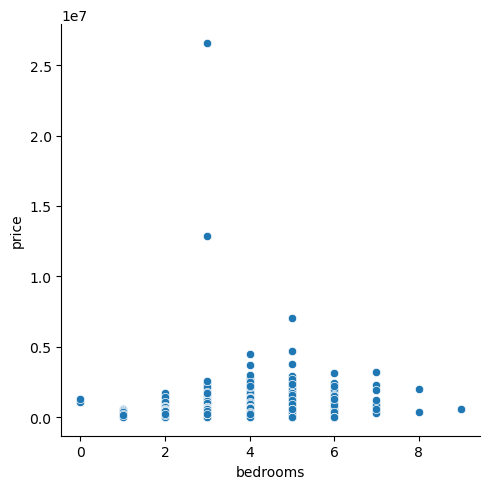

In [135]:
# Relatie tussen variabelen in kaart brengen
# Hebben bepaalde variabelen invloed op de Huisprijs?

sns.relplot(x='bedrooms', y='price', data=data)

(0.0, 13740.0)

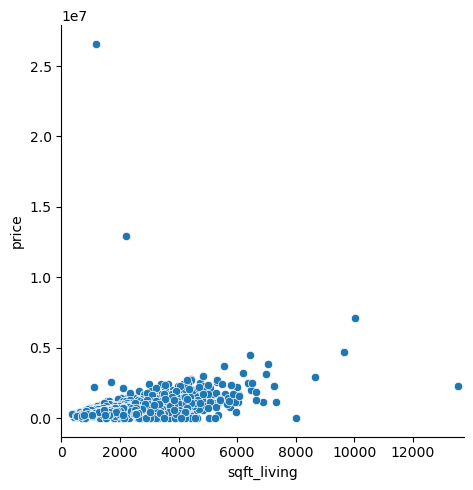

In [142]:
# Hier is wel een duidelijk linear verband (continous)
sns.relplot(x='sqft_living', y='price', data=data)
plt.xlim(0, data['sqft_living'].max()+200)

(0.0, 13740.0)

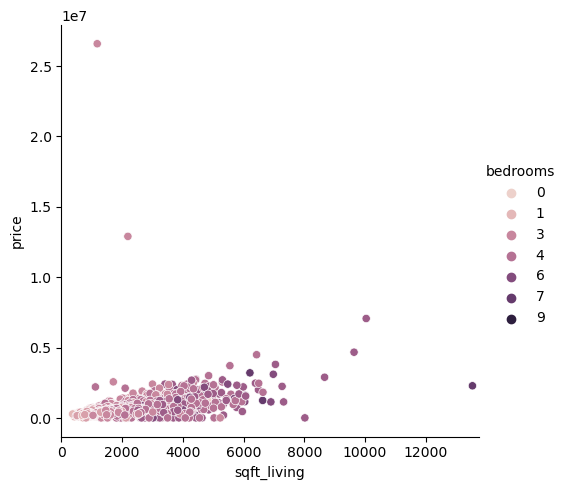

In [143]:
sns.relplot(x='sqft_living', y='price', hue='bedrooms', data=data)
plt.xlim(0, data['sqft_living'].max()+200)

(0.0, 13740.0)

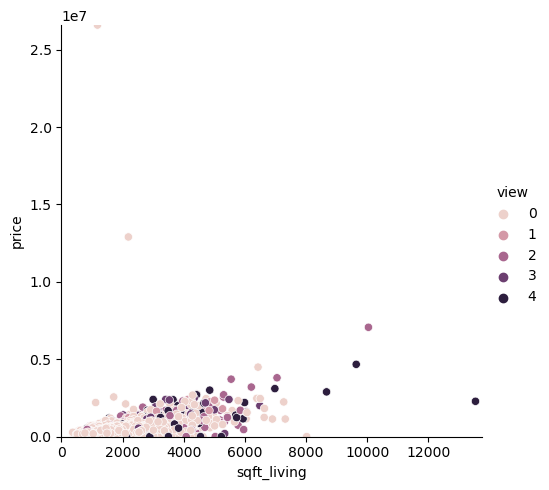

In [146]:
sns.relplot(x='sqft_living', y='price', hue = 'view', data=data)
plt.ylim(0, data['price'].max()+2000)
plt.xlim(0, data['sqft_living'].max()+200)


# De kolommen die mogelijk meegenomen kunnen worden als features zijn:
# bedrooms, bathrooms, sqft_living, floors, view 

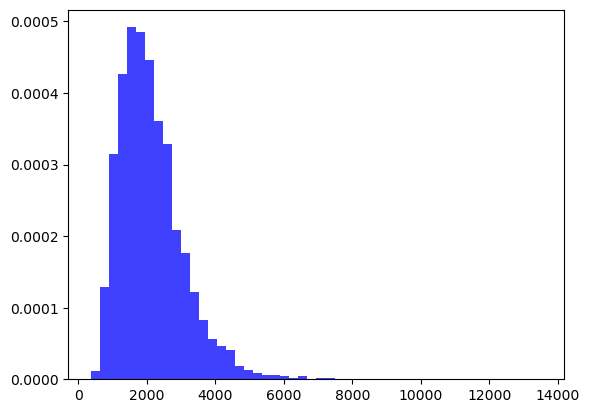

In [60]:
plt.hist(features['sqft_living'], 50, density=True, facecolor='b', alpha = 0.75)
plt.show()

In [ ]:
# histogram nog van price

In [ ]:
# hier de correlation matrix tonen

## 2. Data Cleaning

In deze stap gaan we de data opschonen door te achterhalen of er bepaalde redundancies aanwezig zijn die mogelijk het model kunnen verhinderen. Hiervoor zal er gecheckt worden op NULL-waarden, missing values, het vullen van missing values (gemiddelde waarden ter vervanging), geschikte kolommen uitkiezen voor het model en eventueel kolommen verwijderen (drop columns) die geen verschil gaan maken in de analyse. 

In [99]:
data['price'].value_counts()[0]

49

In [103]:
data[data_price_filter]

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4354  2014-05-05 00:00:00    0.0       3.0       1.75         1490     10125   
4356  2014-05-05 00:00:00    0.0       4.0       2.75         2600      5390   
4357  2014-05-05 00:00:00    0.0       6.0       2.75         3200      9200   
4358  2014-05-06 00:00:00    0.0       5.0       3.50         3480     36615   
4361  2014-05-07 00:00:00    0.0       5.0       1.50         1500      7112   
4362  2014-05-07 00:00:00    0.0       4.0       4.00         3680     18804   
4374  2014-05-09 00:00:00    0.0       2.0       2.50         2200    188200   
4376  2014-05-09 00:00:00    0.0       4.0       2.25         2170     10500   
4382  2014-05-12 00:00:00    0.0       5.0       4.50         4630      6324   
4383  2014-05-13 00:00:00    0.0       5.0       4.00         4430      9000   
4385  2014-05-13 00:00:00    0.0       4.0       4.50         5030     11023   
4386  2014-05-13 00:00:00    0.0       4.0       1.50         2180     22870   
4389  2014-05-15 00:00:00    0.0       4.0       3.50         4210     10308   
4394  2014-05-16 00:00:00    0.0       5.0       3.25         3690     12353   
4405  2014-05-20 00:00:00    0.0       4.0       3.75         3300      4545   
4408  2014-05-21 00:00:00    0.0       5.0       2.25         2880     11965   
4411  2014-05-22 00:00:00    0.0       5.0       2.25         2000      7900   
4412  2014-05-22 00:00:00    0.0       3.0       3.00         1860      7440   
4413  2014-05-22 00:00:00    0.0       4.0       3.00         1990      6180   
4420  2014-05-27 00:00:00    0.0       4.0       1.00         1360     13372   
4442  2014-06-02 00:00:00    0.0       1.0       1.00          720      6000   
4448  2014-06-03 00:00:00    0.0       5.0       2.75         2740      5616   
4453  2014-06-03 00:00:00    0.0       3.0       1.00         1300      6710   
4454  2014-06-03 00:00:00    0.0       5.0       2.50         2090      4698   
4472  2014-06-09 00:00:00    0.0       4.0       3.75         4060     19290   
4478  2014-06-11 00:00:00    0.0       5.0       2.75         2910     53898   
4479  2014-06-11 00:00:00    0.0       5.0       2.00         1910      7200   
4480  2014-06-11 00:00:00    0.0       3.0       2.50         2880     13500   
4481  2014-06-11 00:00:00    0.0       5.0       2.75         3240      6863   
4487  2014-06-12 00:00:00    0.0       4.0       1.00         2080      3500   
4499  2014-06-17 00:00:00    0.0       5.0       3.75         3870      8225   
4507  2014-06-18 00:00:00    0.0       4.0       1.50         2310     68824   
4509  2014-06-18 00:00:00    0.0       6.0       3.00         3020     13783   
4520  2014-06-20 00:00:00    0.0       4.0       2.50         1960     11600   
4521  2014-06-20 00:00:00    0.0       4.0       1.00         1810      7500   
4522  2014-06-22 00:00:00    0.0       2.0       2.25         1490      6770   
4523  2014-06-23 00:00:00    0.0       3.0       4.50         5230     17826   
4528  2014-06-24 00:00:00    0.0       4.0       5.00         4550     18641   
4534  2014-06-24 00:00:00    0.0       3.0       2.75         1310      7300   
4542  2014-06-25 00:00:00    0.0       5.0       3.50         2640      6895   
4552  2014-06-26 00:00:00    0.0       4.0       2.00         2100      4857   
4554  2014-06-27 00:00:00    0.0       2.0       1.00          810      8424   
4555  2014-06-27 00:00:00    0.0       2.0       1.50         1520      8040   
4558  2014-06-28 00:00:00    0.0       4.0       4.25         3500      8750   
4563  2014-07-01 00:00:00    0.0       2.0       2.25         2130      4920   
4567  2014-07-02 00:00:00    0.0       4.0       2.50         4080     18362   
4574  2014-07-02 00:00:00    0.0       3.0       1.00         1520      9030   
4575  2014-07-02 00:00:00    0.0       5.0       6.25         8020     21738   
4588  2014-07-08 00:00:00    0.0       4.0       2.25         2890     18226   

      floors  waterf

In [151]:
data_price_filter = data['price'] == 0

data = data.drop(data[data_price_filter].index)
data.shape

(4551, 18)

In [61]:
sqft_living_filter = data['sqft_living'] > 6000
data[sqft_living_filter]

bedrooms  bathrooms  sqft_living  view  sqft_above  sqft_basement  \
122        7.0       8.00        13540     4        9410           4130   
252        7.0       4.50         6210     2        4760           1450   
462        5.0       6.50         7270     0        6420            850   
839        5.0       4.25         6490     3        3940           2550   
1182       6.0       4.50         6040     0        4100           1940   
1567       6.0       4.25         6980     4        5330           1650   
2286       5.0       4.50        10040     2        7680           2360   
2328       5.0       6.25         8670     4        6120           2550   
2654       5.0       6.75         9640     4        4820           4820   
2731       6.0       5.00         6050     3        6050              0   
2761       4.0       3.00         6430     0        6430              0   
2967       6.0       4.25         6900     0        4820           2080   
3004       7.0       5.50         6630     0        4930           1700   
3202       5.0       4.75         6390     0        4560           1830   
3559       4.0       4.50         6640     0        6640              0   
3729       5.0       5.50         7050     2        4320           2730   
4135       4.0       5.25         6500     0        5180           1320   
4138       5.0       4.00         7320     0        7320              0   
4283       5.0       4.25         6070     0        6070              0   
4575       5.0       6.25         8020     0        8020              0   

      street_n  city_n  statezip_n  
122       2310      31          32  
252        499      35          52  
462       3895      16          17  
839       3118      23          25  
1182      3353      16          17  
1567      3529      23          25  
2286      3286       3           3  
2328       619      35          70  
2654      3463      23          25  
2731      2513      13          14  
2761       319       3           3  
2967      1267      42          44  
3004      1235       3           5  
3202       512      35          53  
3559      1859      42          44  
3729       757       8           3  
4135      1876      22          24  
4138      1557      32          36  
4283      2522      13          14  
4575      1647       3           5

In [62]:
data = data.drop(data[sqft_living_filter].index)
data

bedrooms  bathrooms  sqft_living  view  sqft_above  sqft_basement  \
0          3.0       1.50         1340     0        1340              0   
1          5.0       2.50         3650     4        3370            280   
2          3.0       2.00         1930     0        1930              0   
3          3.0       2.25         2000     0        1000           1000   
4          4.0       2.50         1940     0        1140            800   
5          2.0       1.00          880     0         880              0   
6          2.0       2.00         1350     0        1350              0   
7          4.0       2.50         2710     0        2710              0   
8          3.0       2.50         2430     0        1570            860   
9          4.0       2.00         1520     0        1520              0   
10         3.0       1.75         1710     0        1710              0   
11         4.0       2.50         2920     0        1910           1010   
12         3.0       1.75         2330     0        1970            360   
13         3.0       1.00         1090     0        1090              0   
14         5.0       2.75         2910     0        2910              0   
15         3.0       1.50         1200     0        1200              0   
16         3.0       1.50         1570     0        1570              0   
17         4.0       3.00         3110     0        3110              0   
18         3.0       1.75         1370     0        1370              0   
19         3.0       1.50         1180     0        1180              0   
20         3.0       1.75         2240     0        1550            690   
21         4.0       1.00         1450     0        1450              0   
22         3.0       2.25         1750     0        1470            280   
23         4.0       2.50         2730     0        2730              0   
24         4.0       1.75         1600     0        1130            470   
25         3.0       2.50         2090     0        1360            730   
26         3.0       1.75         2360     0        1360           1000   
27         4.0       2.25         2200     0        1300            900   
28         5.0       2.50         2820     0        2820              0   
29         3.0       2.50         2600     0        1700            900   
30         4.0       1.75         1560     0        1560              0   
31         4.0       2.50         2860     0        2190            670   
32         4.0       2.00         1820     1        1640            180   
33         4.0       2.50         2820     0        2820              0   
34         4.0       2.50         3630     0        2300           1330   
35         3.0       2.50         3240     2        3240              0   
36         2.0       1.00          800     0         800              0   
37         3.0       3.00         1850     0        1090            760   
38         3.0       2.00         1960     2        1650            310   
39         3.0       2.50         2390     2        1440            950   
40         3.0       2.25         1580     0        1580              0   
41         4.0       2.00         1480     0        1480              0   
42         2.0       1.00          850     0         850              0   
43         3.0       2.50         1770     0        1770              0   
44         2.0       1.00         1210     0        1210              0   
45         3.0       1.00         1160     0        1160              0   
46         3.0       2.25         1970     0        1970              0   
47         3.0       2.50         1930     0        1930              0   
48         3.0       2.50         1270     0        1270              0   
49         4.0       2.50         3310     0        3310              0   
50         4.0       2.75         2710     0        2710              0   
51         3.0       1.75         2910     0        2910              0   
52         3.0       2.00      

In [64]:
# beetje verwarrend, maar rijen zijn gedropt en pakt waarden van eerstvolgende rij 
data.iloc[122]

bedrooms            3.0
bathrooms           2.5
sqft_living      1880.0
view                0.0
sqft_above       1880.0
sqft_basement       0.0
street_n         1385.0
city_n             32.0
statezip_n         33.0
Name: 123, dtype: float64

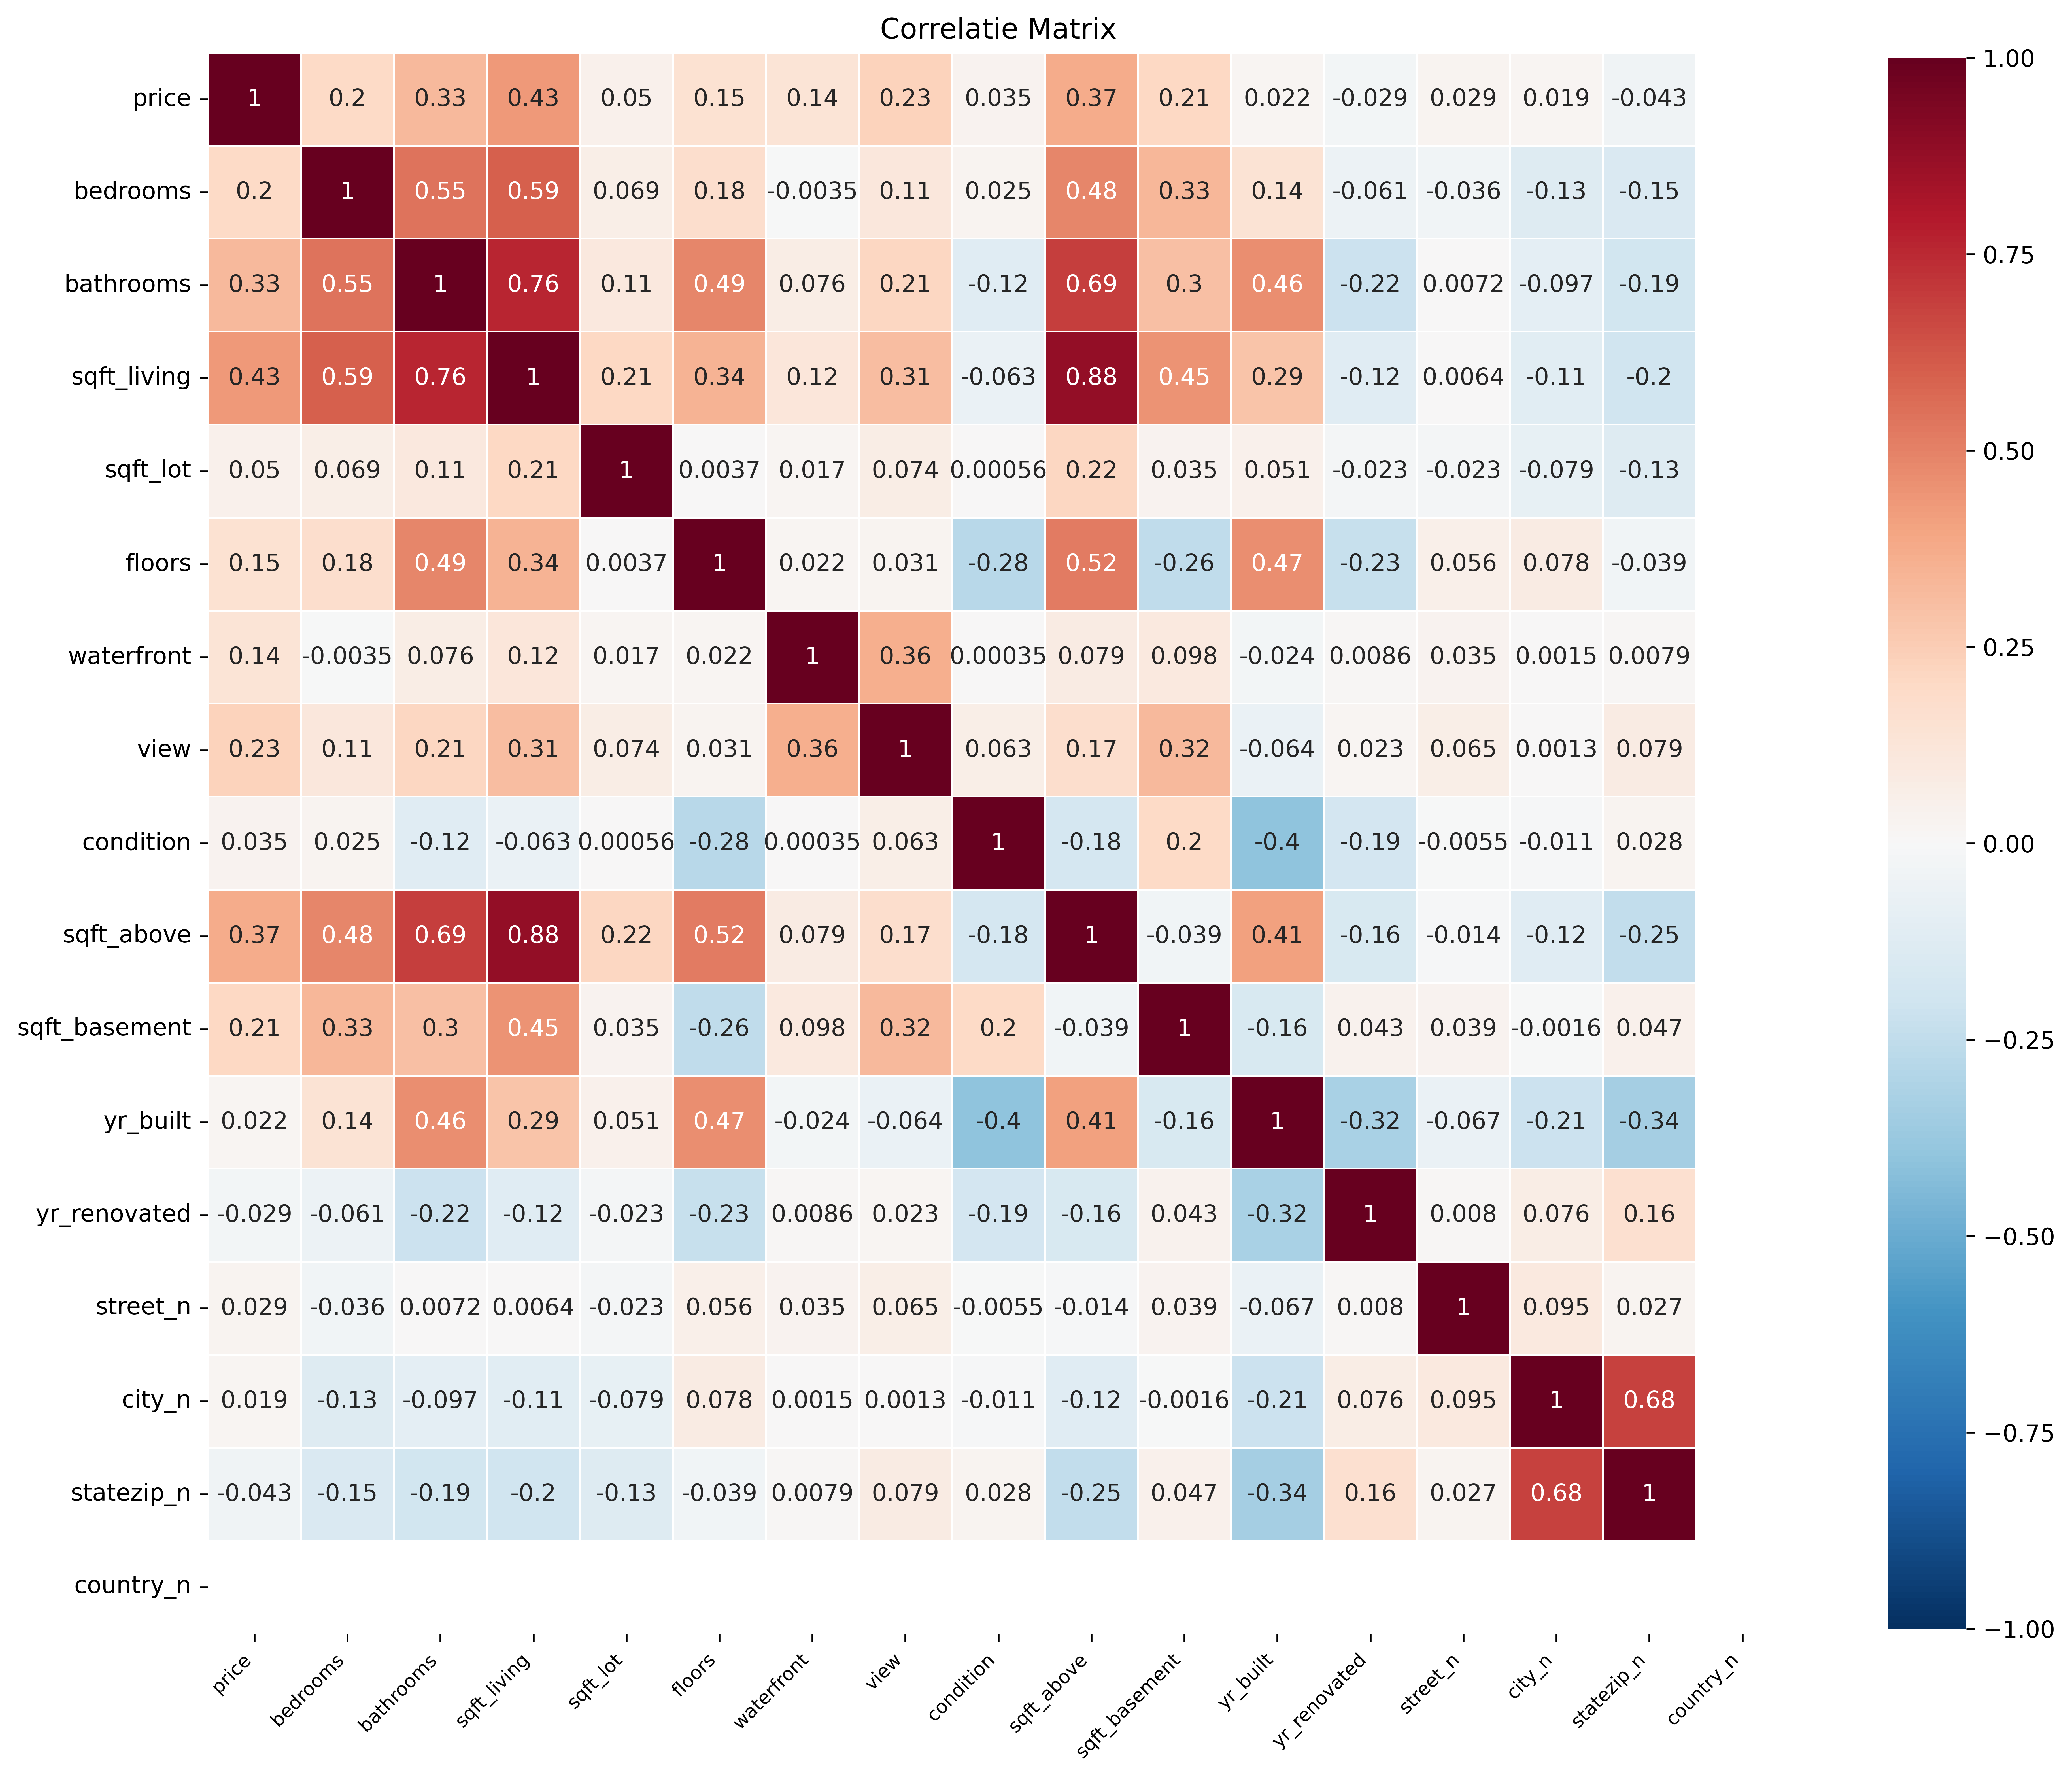

In [148]:
# bedroom, bathrooms, sqft_living, view, sqft_above, sqft_basement
plt.figure(figsize=(15, 15),dpi=600)
g=sns.heatmap(corr_matrix, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
plt.title('Correlatie Matrix')

plt.show()

In [58]:
features_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'sqft_above', 'sqft_basement', 'street_n', 'city_n', 'statezip_n']

In [59]:
features = data.loc[:, features_cols]
features

bedrooms  bathrooms  sqft_living  view  sqft_above  sqft_basement  \
0          3.0       1.50         1340     0        1340              0   
1          5.0       2.50         3650     4        3370            280   
2          3.0       2.00         1930     0        1930              0   
3          3.0       2.25         2000     0        1000           1000   
4          4.0       2.50         1940     0        1140            800   
5          2.0       1.00          880     0         880              0   
6          2.0       2.00         1350     0        1350              0   
7          4.0       2.50         2710     0        2710              0   
8          3.0       2.50         2430     0        1570            860   
9          4.0       2.00         1520     0        1520              0   
10         3.0       1.75         1710     0        1710              0   
11         4.0       2.50         2920     0        1910           1010   
12         3.0       1.75         2330     0        1970            360   
13         3.0       1.00         1090     0        1090              0   
14         5.0       2.75         2910     0        2910              0   
15         3.0       1.50         1200     0        1200              0   
16         3.0       1.50         1570     0        1570              0   
17         4.0       3.00         3110     0        3110              0   
18         3.0       1.75         1370     0        1370              0   
19         3.0       1.50         1180     0        1180              0   
20         3.0       1.75         2240     0        1550            690   
21         4.0       1.00         1450     0        1450              0   
22         3.0       2.25         1750     0        1470            280   
23         4.0       2.50         2730     0        2730              0   
24         4.0       1.75         1600     0        1130            470   
25         3.0       2.50         2090     0        1360            730   
26         3.0       1.75         2360     0        1360           1000   
27         4.0       2.25         2200     0        1300            900   
28         5.0       2.50         2820     0        2820              0   
29         3.0       2.50         2600     0        1700            900   
30         4.0       1.75         1560     0        1560              0   
31         4.0       2.50         2860     0        2190            670   
32         4.0       2.00         1820     1        1640            180   
33         4.0       2.50         2820     0        2820              0   
34         4.0       2.50         3630     0        2300           1330   
35         3.0       2.50         3240     2        3240              0   
36         2.0       1.00          800     0         800              0   
37         3.0       3.00         1850     0        1090            760   
38         3.0       2.00         1960     2        1650            310   
39         3.0       2.50         2390     2        1440            950   
40         3.0       2.25         1580     0        1580              0   
41         4.0       2.00         1480     0        1480              0   
42         2.0       1.00          850     0         850              0   
43         3.0       2.50         1770     0        1770              0   
44         2.0       1.00         1210     0        1210              0   
45         3.0       1.00         1160     0        1160              0   
46         3.0       2.25         1970     0        1970              0   
47         3.0       2.50         1930     0        1930              0   
48         3.0       2.50         1270     0        1270              0   
49         4.0       2.50         3310     0        3310              0   
50         4.0       2.75         2710     0        2710              0   
51         3.0       1.75         2910     0        2910              0   
52         3.0       2.00      

In [ ]:
target = data['price']

Het wijzigen van de data types van kolommen bedrooms en bathrooms (afronden naar boven). prijzen 0 uit kolom price droppen.

## 3. Selecteren van een passend model

In deze stap zal een geschikt model gekozen worden voor dit regression probleem. In dit geval zal een Linear regrssion model gebruikt worden voor het voorspellen van huisprijzen. Dit is een model dat als basis gebruikt kan worden en ook simpel is in te zetten (aangezien ik voor het eerst met machine learning modellen werk). 

In [67]:
# Importeren van Linear Regression model
# Importeren van train_test_split voor splitten van data in train en test set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0     1.5           0     0          3  ...      1955          2005   
1     2.0           0     4          5  ...      1921             0   
2     1.0           0     0          4  ...      1966             0   
3     1.0           0     0          4  ...      1963             0   
4     1.0           0     0          4  ...      1976          1992   

                     street       city  statezip country street_n city_n  \
0      18810 Densmore Ave N  Shoreline  WA 98133     USA     1522     36   
1           709 W Blaine St    Seattle  WA 98119     USA     3899     35   
2  26206-26214 143rd Ave SE       Kent  WA 98042     USA     2291     18   
3           857 170th Pl NE   Bellevue  WA 98008     USA     4263      3   
4         9105 170th Ave NE    Redmond  WA 98052     USA     4352     31   

   statezip_n  country_n  
0          62          0  
1          58          0  
2          26          0  
3           7          0  
4          31          0  

[5 rows x 22 columns]

In [69]:
# Droppen van onnodige en verhinderende features voor de trainingsset
# Ik voorspel alleen de prijs, dus in de test set neem ik alleen price (doelvariabele) mee
# 'date', 'price', 'street', 'city', 'statezip', 'country', 'yr_built', 'yr_renovated', 'condition', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement', 'bathrooms', 'sqft_living', 'floors', 'view'

X = features
y = target

In [70]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [71]:
# Splitten/scheiden van de data in een trainingset en een testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [72]:
# Oproepen van de Linear Regression model
linreg = LinearRegression()

In [73]:
# Fitten van de Regression model op de trainingsdata
linreg.fit(X_train, y_train)

LinearRegression()

In [74]:
predictions = linreg.predict(X_test)

In [75]:
predictions

array([1154271.75645257,  434275.52005257, 1411712.87711866, ...,
        465956.65571845,  575316.04532396,  666015.7701451 ])

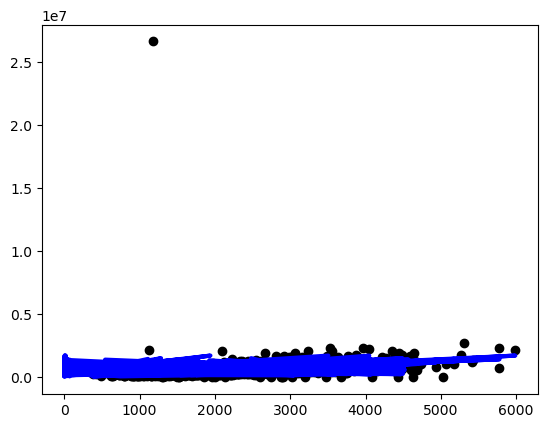

In [152]:
plt.scatter(X_test['sqft_living'], y_test, color="black")
plt.plot(X_test, predictions, color="blue", linewidth=3)
plt.show()

## 4. Evalueren van het model

In deze stap zal ik het model evalueren om te kijken hoe goed het model presteert. Hiervoor zal ik de accuracy checken (boven 70).

In [76]:
# Efficiency
linreg.score(X_test, y_test)

0.07231273547800054

In [77]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linreg, X, y, cv=10, scoring="r2"))

[ 0.5042168   0.52168021  0.5390637   0.47102235  0.50686492  0.56469758
  0.56989467  0.52952278  0.50488666 -0.02097444]
